In [1]:
%matplotlib inline
import os, glob
import numpy as np
import matplotlib.pyplot as plt


Using Theano backend.


In [2]:
small_train_data_folder = os.getcwd() + '/data/train_sm'
small_test_data_folder = os.getcwd() + '/data/test_sm'

##### Exploring data dimension

In [3]:
training_jpeg_file_names = [f for f in glob.glob("./data/train_sm/*.jpeg")]
test_jpeg_file_names = [f for f in glob.glob("./data/test_sm/*.jpeg")]

print test_jpeg_file_names[1:5] #Print a few sample file names

['./data/test_sm/set100_2.jpeg', './data/test_sm/set100_3.jpeg', './data/test_sm/set100_4.jpeg', './data/test_sm/set100_5.jpeg']


##### Converting 2D image into a 1D with 3 RGB features

In [4]:
sample_data = plt.imread(training_jpeg_file_names[2])
dimensions = np.shape(sample_data)
print(dimensions)

(2329, 3100, 3)


In [6]:
old_dimension = [0,0]
files_info = []
X_train = []
X_train = np.empty([2329,3099,3])
Y_train = np.empty([2])
X_list = []
Y_list = []
print ("Total number of files is: ",len(training_jpeg_file_names))

for i, item in enumerate(training_jpeg_file_names):
    data = np.asarray(plt.imread(item))
    data = data[:,:3099,:]

    tag = training_jpeg_file_names[i].split('set')[1].split('.')[0].split('_')

    X_list.append(data)
    Y_list.append(tag)


('Total number of files is: ', 350)


In [36]:
training_size = 200

X_train = np.asarray(X_list)[0:training_size,:,:,:]
X_test = np.asarray(X_list)[training_size:,:,:,:]
np.rollaxis(X_train,1,3)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (200, 2329, 3099, 3))
(200, 'train samples')
(150, 'test samples')


In [45]:
np.rollaxis(X_train,1,3)
X_train.shape

(200, 2329, 3099, 3)

In [42]:
X_train.shape

(200, 2329, 3099, 3)

In [8]:
y_train = np.asarray(Y_list)[0:training_size,:]
y_test = np.asarray(Y_list)[training_size:,:]
y_train = y_train.astype('int8')
y_test = y_test.astype('int8')

print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

('y_train shape:', (200, 2))
(200, 'train samples')
(150, 'test samples')


In [35]:
np.savez("./data/y_data", y_train=y_train,y_test=y_test)
np.savez("X_data", X_train=X_train, X_test=X_test)

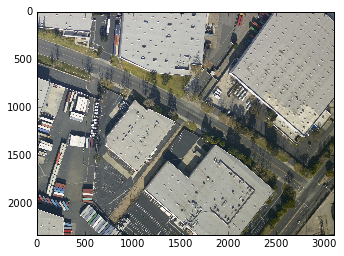

In [10]:
plt.imshow(X_train[20,:,:,:])

##### Arbitrary plot a single image